# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [2]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

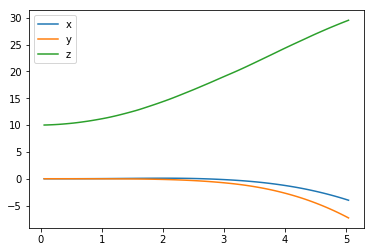

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

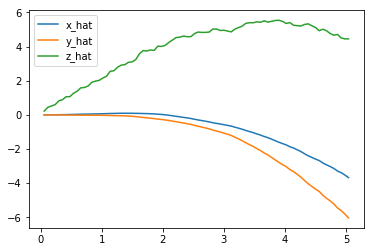

In [4]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

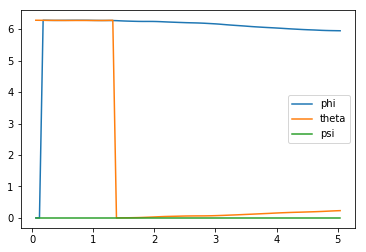

In [5]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

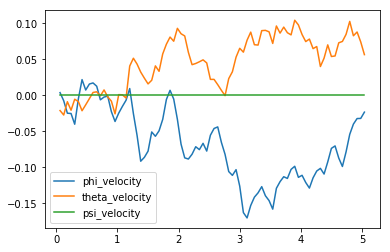

In [6]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

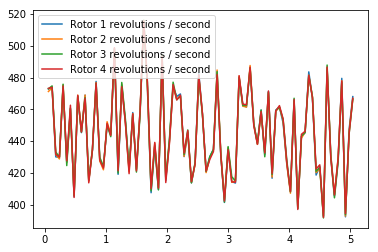

In [7]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [8]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[ -4.00511341  -7.29788637  29.52915081   5.94859472   0.23114891   0.        ]
[-3.67560294 -6.03530486  4.44965851]
[-0.02341182  0.05641428  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [9]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 100
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode =  100, score =   6.840 (best =   6.842), noise_scale = 3.255

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [10]:
## TODO: Train your agent here.
from agents.agent import DDPG
from task import Task

num_episodes = 100
init_pose = np.array([0.0, 0.0, 10.0, 0.0, 0.0, 0.0])
target_pos = np.array([0.0, 0.0, 100.0])
task = Task(init_pose=init_pose, target_pos=target_pos)
agent = DDPG(task)

list_rewards = []

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode()
    
    while True:
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        agent.step(action, reward, next_state, done)
        state = next_state
        
        if done:
            best_x, best_y, best_z = agent.best_pos if len(agent.best_pos) == 3 else [0, 0, 0]
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), best_pos = ({:.2f}, {:.2f}, {:.2f})".format(
                i_episode, agent.score, agent.best_score, best_x, best_y, best_z), end="")  # [debug]
            break
    
    list_rewards.append(agent.score)
    sys.stdout.flush()

Using TensorFlow backend.


Episode =  100, score =   6.574 (best =   6.607), best_pos = (42.92, -2.55, 113.25)

I decided to train my agent using a __Task where he would start at position (0, 0, 10) and should try to fly higher up to (0, 0, 100)__. As can be seen by the result above, __my agent learned to go higher somehow, but he's not good yet__.

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

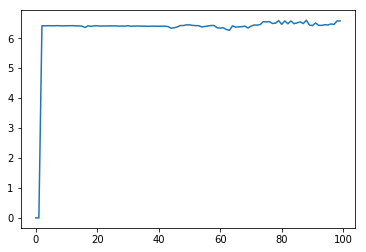

In [11]:
## TODO: Plot the rewards.
plt.plot(list_rewards)

In [12]:
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

done = False
state = agent.reset_episode()

# Run the simulation, and save the results.
while True:
    rotor_speeds = agent.act(state)
    _, _, done = task.step(rotor_speeds)

    to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
    for ii in range(len(labels)):
        results[labels[ii]].append(to_write[ii])

    if done: break

Below, we'll plot the positions of (x, y, z) of the agent through the time in the task I designed. We can see the agent learned to take off, going up as needed. However, he went higher too fast, exceeding the target position (0, 0, 100).

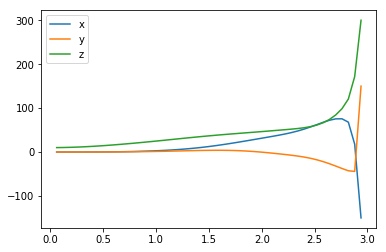

In [13]:
plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

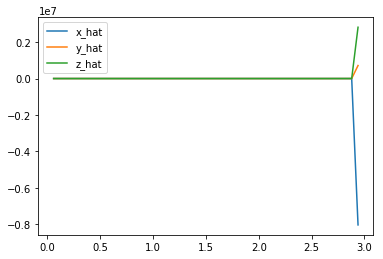

In [17]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

To finish, I'll plot the agent's flight towards the target position. In the graph below, we can see the agent started noisy (going forward), but he tried to correct his position and lifting himself up quickly.

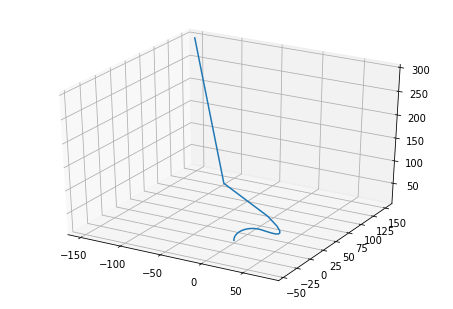

In [15]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
 
x = results['x']
y = results['y']
z = results['z']

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(x, y, z) 
plt.show()

In [16]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[-150.          150.          300.            3.42465099    4.98967822
    0.        ]
[-8031359.02164032   714277.18942391  2814870.36462494]
[ 1.72469451 -3.58583648  0.        ]


We can see the last position of the agent was (-150, 150, 300) instead of (0, 0, 100).

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: I have tried a lot of different reward functions. Actually, I tried to inspire my reward function in the reward function developed by google to teach an agent how to walk (showed in this module). 

First, I tried to develop a function to teach the agent reach a target position. After a few attemps, I ended up with the following equation:

```
reward = 1 - 0.003*(abs(self.sim.pose[:3] - self.target_pos)).sum() # reach a target
```
With this function I achieved good results. Although the agent did not reach the target precisely, he was going towards the target position at least. 

My next step focused on trying to teach the agent how to __take off__ in a good way. For this case, I added the following factor to previous equation:

```
reward += 0.002*z # takeoff
```

This also helped the agent, but not that much according to my experiments. 

I also tried to design rewards to each of desired behaviors (land softly, hover in place, and so on). After a few attempts, I ended up with the following equation:

```
reward = np.sum(np.abs([x, y, z] - self.target_pos)) # reach a target
reward -= 0.005*v_z # land softly
reward += 0.002*z**2 # takeoff
reward -= 0.0005*((ang_vx**2) + (ang_vy**2) + (ang_vz**2)) # hover in place
reward += 0.02 # fly as long as possible
```

However, this equation decreased my score over time. In fact, I realized that when I tried to add more rewards than just _"reach a target"_ and _"takeoff"_, my agent got worse. I tried a lot of different constants to multiply each factor, but none of them helped my agent to learn well.

Finally, I tried the scale my rewards between $[-1,1]$ to see if that could improve my score. Thus, I tried the equation below: 

```
reward = np.tanh(1 - 0.003*(abs(self.sim.pose[:3] - self.target_pos))).sum()
```

And that was the function that worked better for my case. Maybe I should try to improve my reward's equation in order to improve my agent as well.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**: I used the DDPG algorithm as suggested. This was the only one I tested.

In respect of the hyperparameters, I followed the suggestions of original DDPG paper for most of my hyperparameters with a few modification. Thus, I set:

- __discount factor__ $\gamma = 0.99$
- $\tau = 0.01$ (10x higher than DDPG)
- __batch size__ = 64
- __Actor's learning rate__ = 2e-4 (2x higher than DDPG)
- __Critic's learning rate__ = 2e-3 (2x higher than DDPG)
- __exploration theta__ = 0.2 (instead of 0.15 in DDPG)
- __exploration sigma__ = 0.3 (instead of 0.2 in DDPG)

In respect of my architecture, I tried a lot of different configurations. I tried different amounts of layers, #nodes and regularization. After a lot of attempts, I ended up with the following architecture:

__ACTOR__:
```
net = layers.Dense(units=64, activation=None)(states)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(rate=0.5)(net)
net = layers.Dense(units=64, activation=None)(net)
net = layers.BatchNormalization()(net)
net = layers.Activation('relu')(net)
```

I chose 64 units per layer since I realized that more neurons did not helped that much. The same for layers. I used _Batch Normalization_ and _Dropout_ to regularize my network and ReLU activations to increase the power of my network and allow it finding non-linear patterns.

__CRITIC__:

```
# Add hidden layer(s) for state pathway
net_states = layers.Dense(units=256, activation='relu')(states)
net_states = layers.Dense(units=128, activation='relu')(net_states)

# Add hidden layer(s) for action pathway
net_actions = layers.Dense(units=256, activation='relu')(actions)
net_actions = layers.Dense(units=128, activation='relu')(net_actions)

# Combine state and action pathways
net = layers.Add()([net_states, net_actions])
net = layers.Activation('relu')(net)

# Add more layers to the combined network if needed
net = layers.Dense(units=100, activation='relu')(net)

# Add final output layer to prduce action values (Q values)
Q_values = layers.Dense(units=1, name='q_values', kernel_initializer=layers.initializers.RandomUniform(minval=-0.003, maxval=0.003))(net)
```

For my Critic network, I followed the pattern of DDPG paper: 2 hidden layers where the second has less neurons than first. In addition, I also added a layer after the merge of net_states and net_actions with 100 units. Finally, I used a RandomUniform distribution to initialize the weights of my last layer.

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**: According to my rewards plot, we can see the score goes high pretty quick in the beginning of training (maybe because I set a high value for $\tau$ and _discount factor_), suggesting an aha moment. However, the performance keeps improving through time, but smoothly.

The task was very hard to learn. Since the task is hard to model, design the reward function is hard as well. Training the agent was kind of frustating sometimes as I didn't have that much intuition tunning the hyperparameter. Reading the DDPG paper helped a lot tough.

The final performance of the agents was good. The agent learned to fly towards a target. However, the agent was not able to stop at the target and he does not have full control of his rotors yet.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**: The hardest part of the project was to understand the concepts related to continuos control task, specially the key concepts of Policy Gradients. However, these concepts become more clear as I started reading and writing code to train my agent.

In addition, design the reward function was hard as well, but important to show how important it is to define the agent's behaviour. 